# Tutorial - Plots
_From: http://docs.juliaplots.org/latest/tutorial/_

In [1]:
1 + 2

3

In [2]:
ans

3

In [4]:
pi

π = 3.1415926535897...

## Basic Plotting: Line Plots

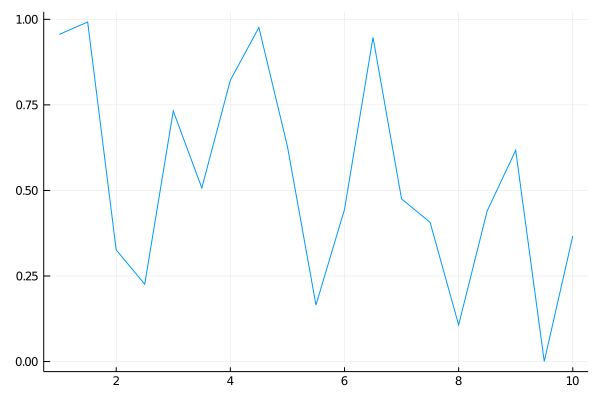

In [21]:
using Plots
x = 1:0.5:10; y = rand(19); # plotting data
plot(x, y)

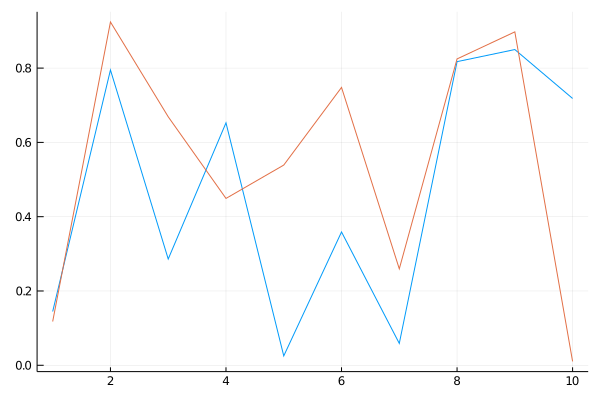

In [23]:
x = 1:10; y = rand(10, 2) # 2 cols -> two lines
plot(x, y)

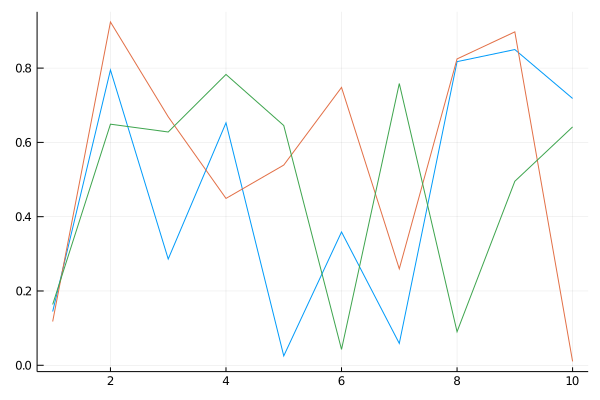

In [24]:
z = rand(10)
plot!(x, z)

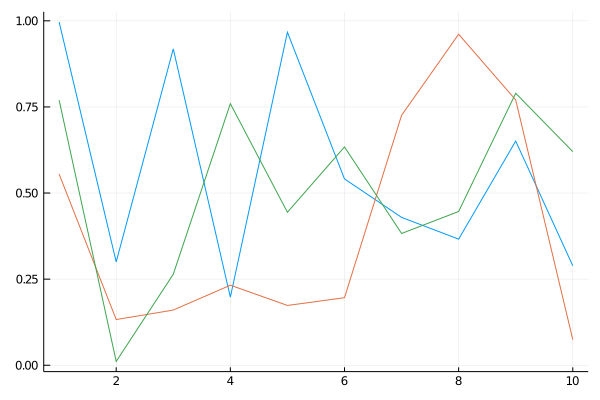

In [25]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
p = plot(x, y)
z = rand(10)
plot!(p, x, z)

## Plot Attributes

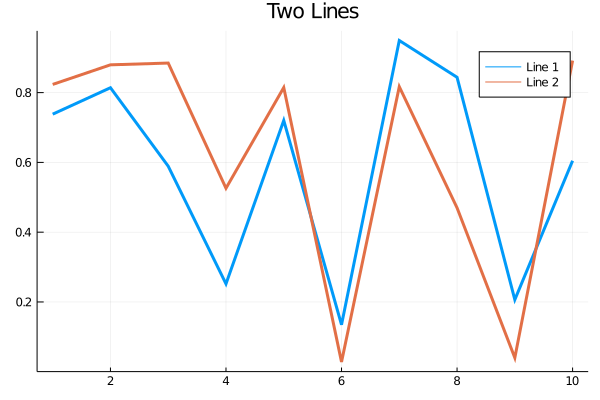

In [28]:
x = 1:10; y = rand(10, 2)
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3, legend=:best)

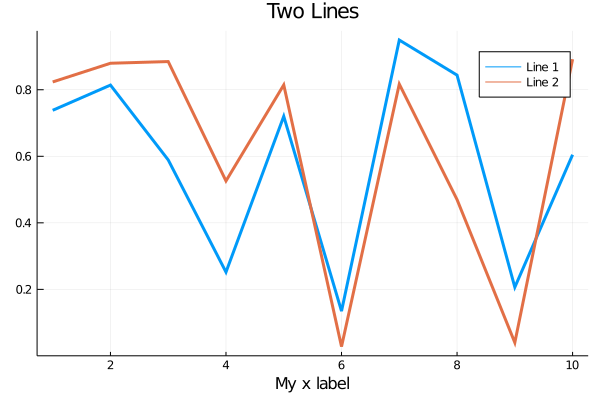

In [29]:
xlabel!("My x label")

## Plotting Backends

In [32]:
x = 1:10; y = rand(10, 2)
plotly() # set backend to PLotly
plot(x, y, title = "This is Plotted using Plotly", legend=:best)

<!DOCTYPE html>
 
 
 Plots.jl

In [104]:
x = 1:10; y = rand(10, 2)
plotlyjs() # set backend to PLotly
plot(x, y, title = "This is Plotted using Plotly", legend=:best)

<!DOCTYPE html>
 
 
 Plots.jl

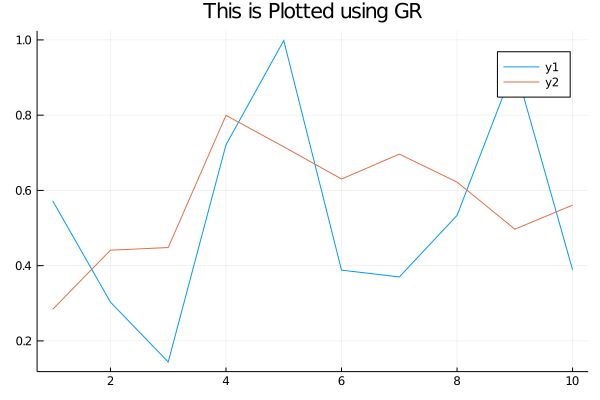

In [36]:
gr() # Set the backend to GR
plot(x, y, title = "This is Plotted using GR", legend=:best)

In [35]:
savefig("myplot.png") # Saves the CURRENT_PLOT as a .png
savefig(p, "myplot.pdf") # Saves the plot from p as a .pdf vector graphic

## Changing the Plotting Series

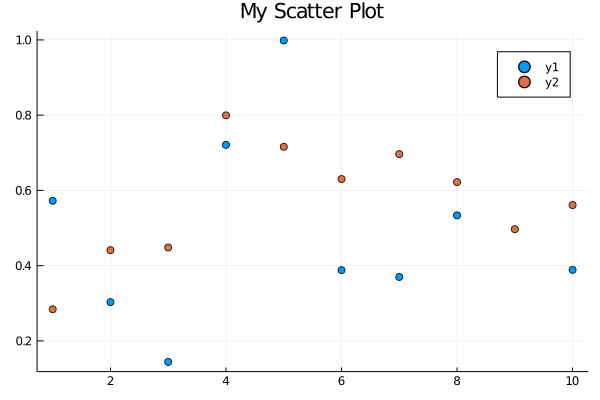

In [38]:
gr()
plot(x, y, seriestype=:scatter, title="My Scatter Plot", legend=:best)

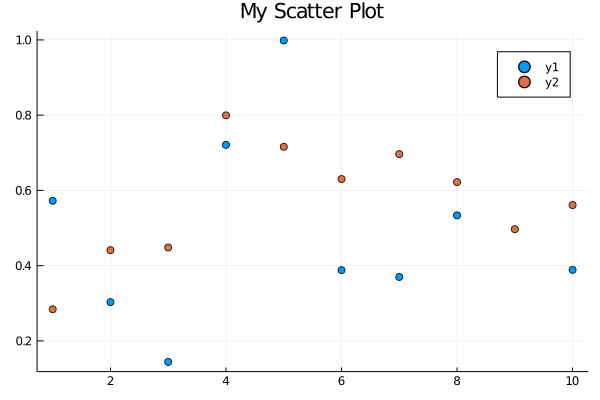

In [40]:
scatter(x, y, title="My Scatter Plot", legend=:best)

## Combining Multiple Plots as Subplots

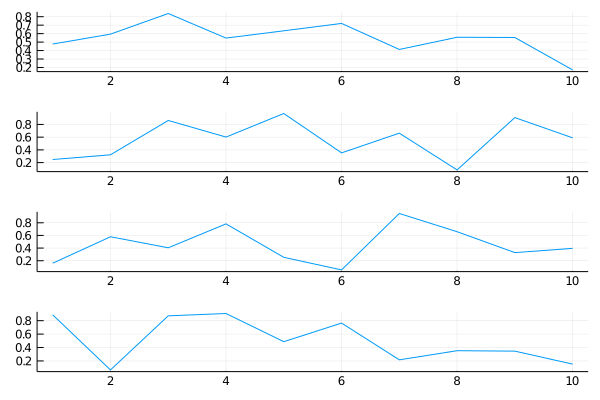

In [51]:
gr()
y = rand(10, 4)
plot(x, y, layout = (4, 1))

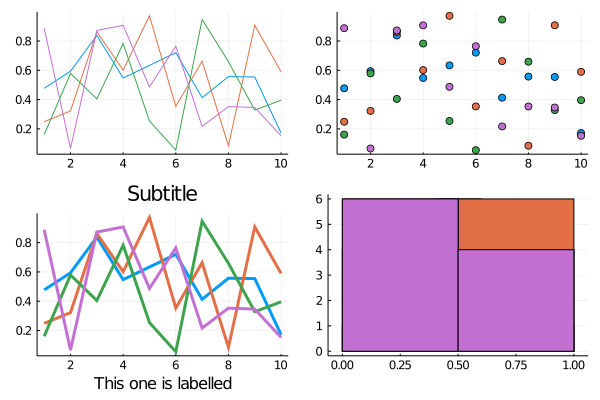

In [52]:
gr()
p1 = plot(x, y)
p2 = scatter(x, y)
p3 = plot(x, y, xlabel = "This one is labelled", lw = 3, title = "Subtitle")
p4 = histogram(x, y)
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

## Using User Recipes

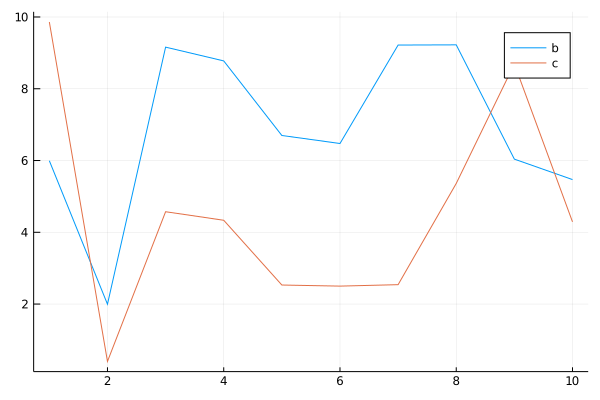

In [56]:
# Pkg.add("StatsPlots")
using StatsPlots # Required for the DataFrame user recipe
# Now let's create the DataFrame
using DataFrames
df = DataFrame(a = 1:10, b = 10 * rand(10), c = 10 * rand(10))
# Plot the DataFrame by declaring the points by the column names
@df df plot(:a, [:b :c], legend = :best) # x = :a, y = [:b :c]. Notice this is two columns!

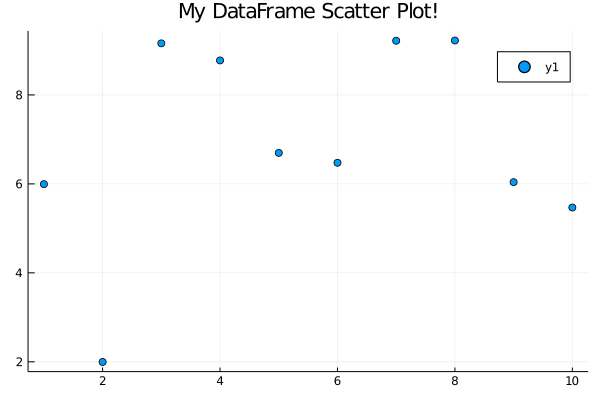

In [57]:
@df df scatter(:a, :b, title = "My DataFrame Scatter Plot!", legend = :best) # x = :a, y = :b

## Using a Type Recipe

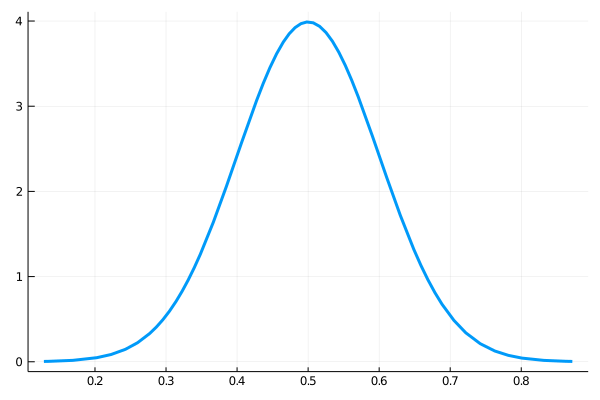

In [71]:
using Distributions
plot(Normal(0.5, 0.1), lw = 3)

## Using Plot Recipes

┌ Warning: Attribute alias `ylabel` detected in the plot recipe defined for the signature (::Type{Val{:marginalhist}}, ::AbstractPlot). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the plot recipe defined for the signature (::Type{Val{:marginalhist}}, ::AbstractPlot). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the plot recipe defined for the signature (::Type{Val{:marginalhist}}, ::AbstractPlot). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the plot recipe defined for the signature (::Type{Val{:marginalhist}}, ::Abs

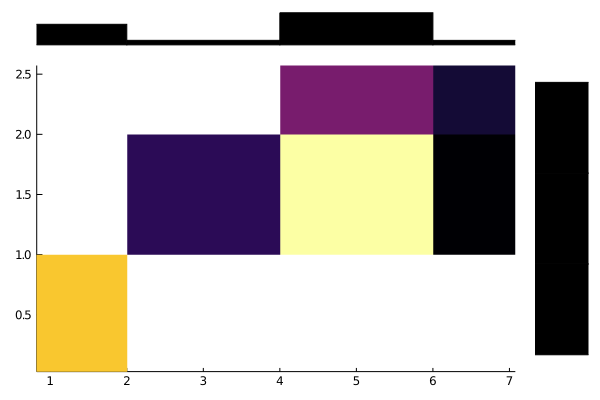

In [72]:
#Pkg.add("RDatasets")
using RDatasets, StatsPlots
iris = dataset("datasets", "iris")
@df iris marginalhist(:PetalLength, :PetalWidth)

## Using Series Recipes

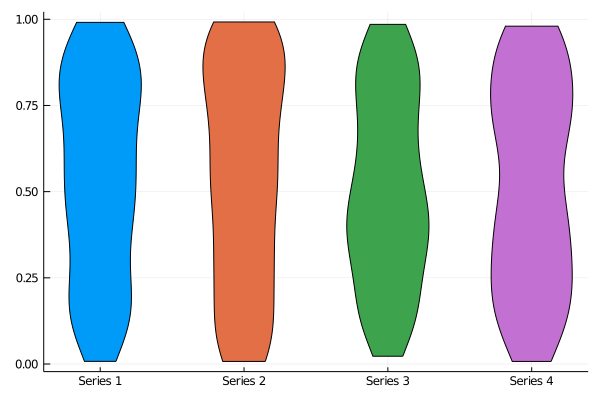

In [73]:
y = rand(100, 4) # Four series of 100 points each
violin(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)

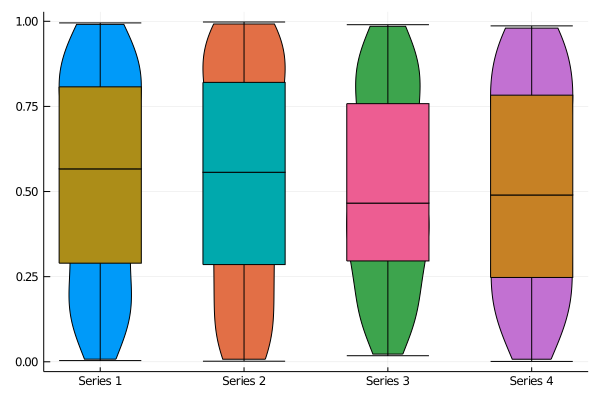

In [74]:
boxplot!(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)

## Simple is Beautiful

┌ Info: Saved animation to 
│   fn = /home/stanley/github/sabaronett/Numerical-Optimization/homework/tmp.gif
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/animation.jl:104


Plots.AnimatedGif("/home/stanley/github/sabaronett/Numerical-Optimization/homework/tmp.gif")
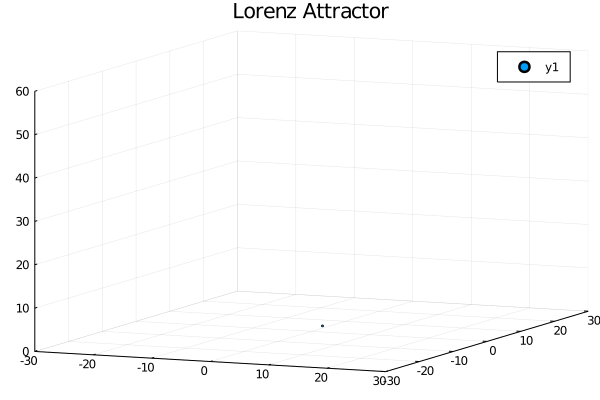

In [1]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

┌ Info: Saved animation to 
│   fn = /home/stanley/github/sabaronett/Numerical-Optimization/homework/tmp.gif
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/animation.jl:104


Plots.AnimatedGif("/home/stanley/github/sabaronett/Numerical-Optimization/homework/tmp.gif")
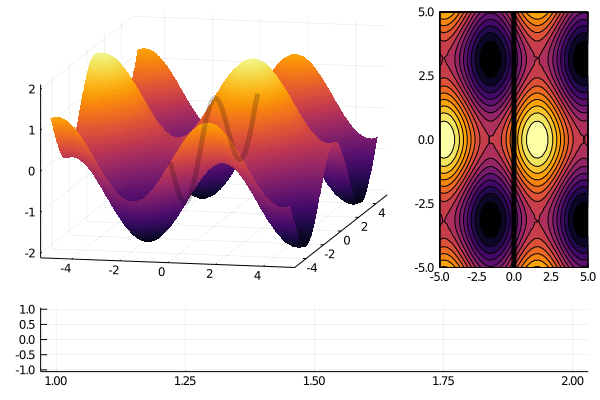

In [2]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

In [45]:
# load a dataset
using RDatasets
iris = dataset("datasets", "iris");

# load the StatsPlots recipes (for DataFrames) available via:
# Pkg.add("StatsPlots")
using StatsPlots

# Scatter plot with some custom settings
@df iris scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    title = "My awesome plot",
    xlabel = "Length",
    ylabel = "Width",
    m = (0.5, [:cross :hex :star7], 12),
    bg = RGB(0.2, 0.2, 0.2)
)

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1260


ArgumentError: ArgumentError: Package StatsPlots not found in current path:
- Run `import Pkg; Pkg.add("StatsPlots")` to install the StatsPlots package.


# Attributes
_From: http://docs.juliaplots.org/latest/attributes/_

## Introduction to Attributes

In [75]:
# Valid Operations
plotattr(:Plot)
plotattr(:Series)
plotattr(:Subplot)
plotattr(:Axis)

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title
Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, match_dimensions, normalize, orientation, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, zerror
Defined Subplot attributes are:
annotations, aspect_ratio, background

In [76]:
plotattr("size")

size {NTuple{2,Int}}
windowsize, wsize

(width_px, height_px) of the whole Plot
Plot attribute,  default: (600, 400)


## Magic Arguments

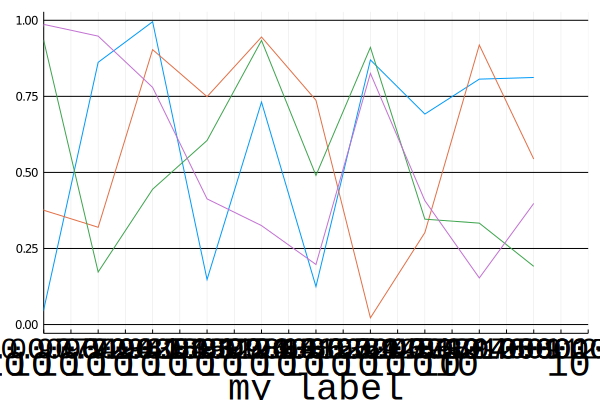

In [96]:
plot(y, xaxis = ("my label", (0,10), 0:0.5:10, :log, :flip, font(20, "Courier")))

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/args.jl:1181
┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/args.jl:1181
┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/args.jl:1181
┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/args.jl:1181


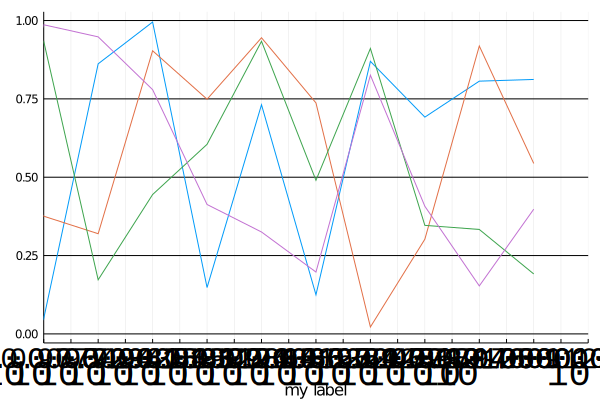

In [79]:
plot(y,
    xlabel = "my label",
    xlims = (0,10),
    xticks = 0:0.5:10,
    xscale = :log,
    xflip = true,
    xtickfont = font(20, "Courier")
)

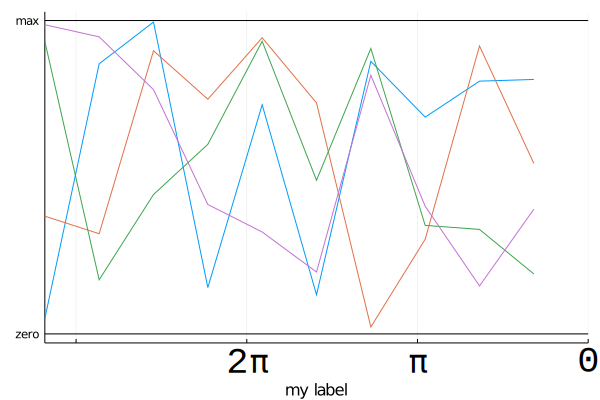

In [80]:
plot!(xticks = ([0:π:3*π;], ["0", "\\pi", "2\\pi"]))
yticks!([-1:1:1;], ["min", "zero", "max"])

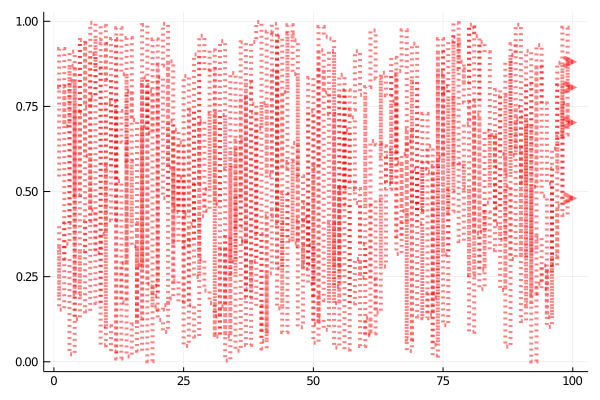

In [97]:
plot(y, line = (:steppre, :dot, :arrow, 0.5, 4, :red))

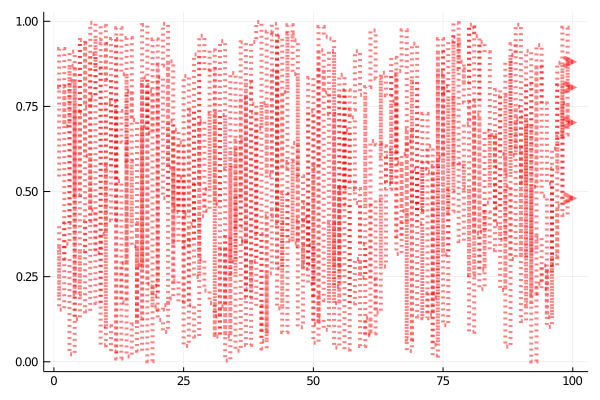

In [98]:
plot(y,
    seriestype = :steppre,
    linestyle = :dot,
    arrow = :arrow,
    linealpha = 0.5,
    linewidth = 4,
    linecolor = :red
)

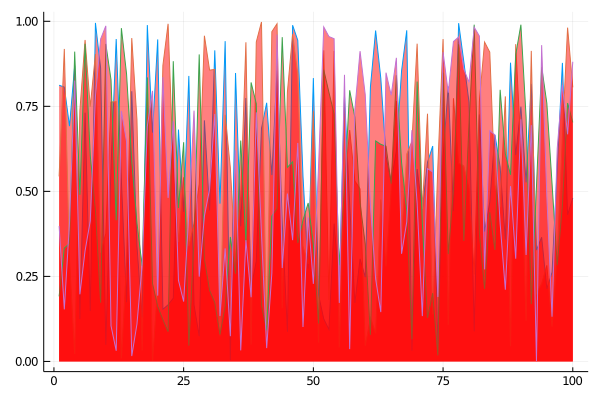

In [99]:
plot(y, fill = (0, 0.5, :red))

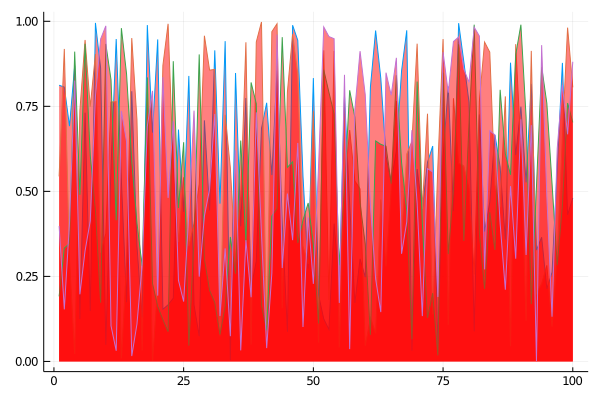

In [100]:
plot(y,
    fillrange = 0,
    fillalpha = 0.5,
    fillcolor = :red
)

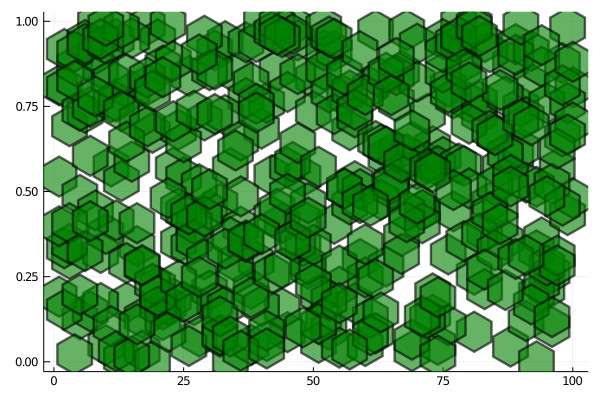

In [102]:
scatter(y, marker = (:hexagon, 20, 0.6, :green, stroke(3, 0.2, :black, :dot)))

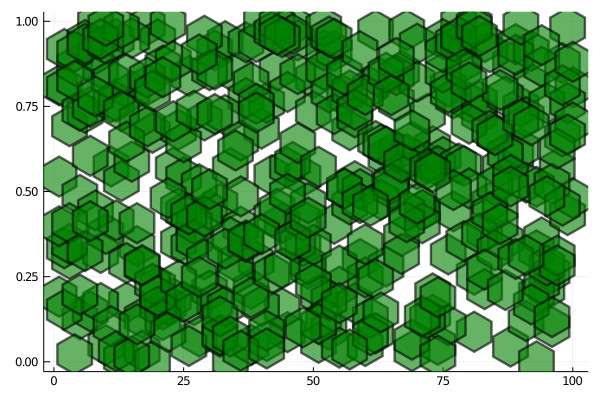

In [103]:
scatter(y,
    markershape = :hexagon,
    markersize = 20,
    markeralpha = 0.6,
    markercolor = :green,
    markerstrokewidth = 3,
    markerstrokealpha = 0.2,
    markerstrokecolor = :black,
    markerstrokestyle = :dot
)